In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import os
global weather_df

In [9]:
weather_df = pd.read_csv('bengaluru.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,18,11,2,91,0.0,1014,14,10,109,8
2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,17,9,2,93,0.0,1014,14,7,85,6
2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,16,7,2,94,0.0,1014,13,5,61,4
2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,15,5,2,96,0.0,1014,12,2,37,3
2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,18,5,1,88,0.0,1015,14,5,45,3


In [10]:
weather_df = weather_df.loc[:,['mintempC', 'maxtempC', 'tempC','precipMM', 'humidity']]
print(f'dataset shape (rows, columns) - {weather_df.shape}')
weather_df.head()

dataset shape (rows, columns) - (96432, 5)


,mintempC,maxtempC,tempC,precipMM,humidity
date_time,,,,,
2009-01-01 00:00:00,12,27,14,0.0,91
2009-01-01 01:00:00,12,27,14,0.0,93
2009-01-01 02:00:00,12,27,13,0.0,94
2009-01-01 03:00:00,12,27,12,0.0,96
2009-01-01 04:00:00,12,27,14,0.0,88


In [11]:
weather_df.describe()

,mintempC,maxtempC,tempC,precipMM,humidity
count,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,19.336735,29.646093,23.979810,0.077719,64.895460
std,2.773771,3.446427,4.540028,0.385865,21.856869
min,11.000000,18.000000,0.000000,0.000000,6.000000
25%,18.000000,27.000000,21.000000,0.000000,49.000000
50%,20.000000,29.000000,23.000000,0.000000,68.000000
75%,21.000000,32.000000,27.000000,0.000000,83.000000
max,28.000000,40.000000,40.000000,16.900000,100.000000


array([<AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>], dtype=object)

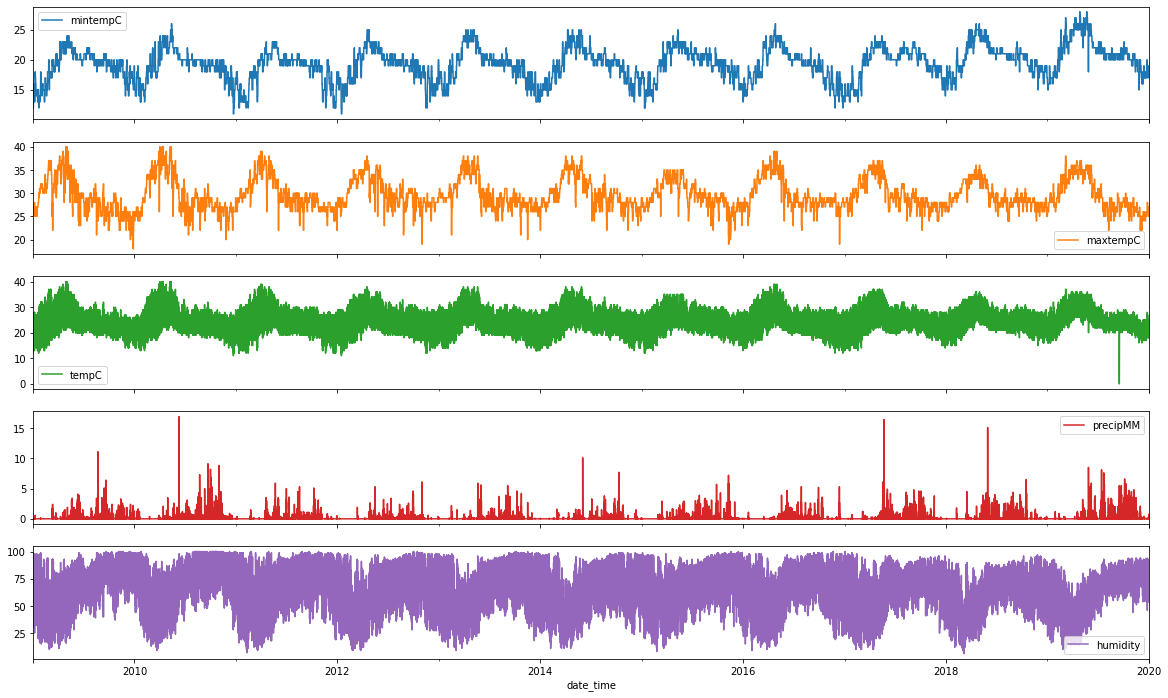

In [12]:
weather_df.plot(subplots=True, figsize=(20,12))

In [13]:
tempdf = pd.DataFrame()
humidf = pd.DataFrame()
percdf = pd.DataFrame()

In [31]:
def ClimatePred(filename):
    df=pd.read_csv(str('bengaluru')+str(".csv"),parse_dates=['date_time'])
    df['year'] = pd.DatetimeIndex(df['date_time']).year
    df['month'] = pd.DatetimeIndex(df['date_time']).month
    
    global tempdf
    x=pd.DataFrame(df.groupby(['year'])[['tempC']].mean().sort_values(by='year',ascending=False))
    tempdf[str(filename)] = x['tempC']
    print(x)
    x=x.reset_index('year')
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(10,8))
    sns.barplot(data=x,x='tempC',y='year',orient='h',palette='viridis')
    
    global humidf
    x=pd.DataFrame(df.groupby(['year'])[['humidity']].mean().sort_values(by='year',ascending=False))
    humidf[str(filename)] = x['humidity']

    global percdf
    x=pd.DataFrame(df.groupby(['year'])[['precipMM']].mean().sort_values(by='year',ascending=False))
    percdf[str(filename)] = x['precipMM']

          tempC
year           
2020  21.708333
2019  25.017466
2018  24.631050
2017  24.145434
2016  23.949226
2015  23.849087
2014  24.060046
2013  23.810046
2012  23.898224
2011  23.389612
2010  23.627511
2009  23.406735
          tempC
year           
2020  21.708333
2019  25.017466
2018  24.631050
2017  24.145434
2016  23.949226
2015  23.849087
2014  24.060046
2013  23.810046
2012  23.898224
2011  23.389612
2010  23.627511
2009  23.406735
          tempC
year           
2020  21.708333
2019  25.017466
2018  24.631050
2017  24.145434
2016  23.949226
2015  23.849087
2014  24.060046
2013  23.810046
2012  23.898224
2011  23.389612
2010  23.627511
2009  23.406735
          tempC
year           
2020  21.708333
2019  25.017466
2018  24.631050
2017  24.145434
2016  23.949226
2015  23.849087
2014  24.060046
2013  23.810046
2012  23.898224
2011  23.389612
2010  23.627511
2009  23.406735
          tempC
year           
2020  21.708333
2019  25.017466
2018  24.631050
2017  24.145434
2016  23

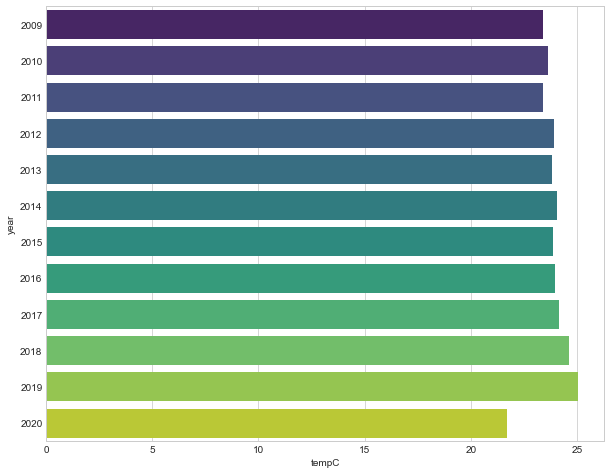

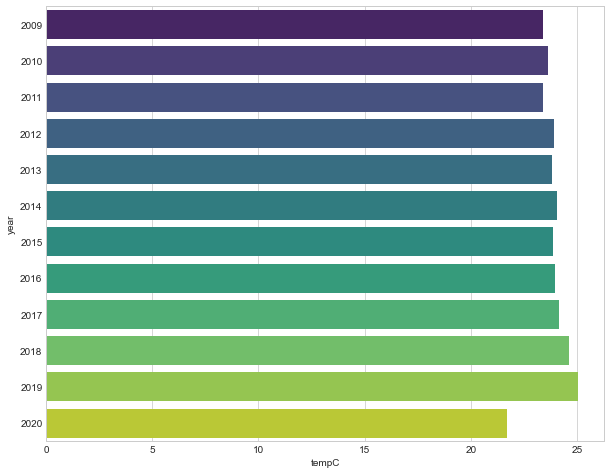

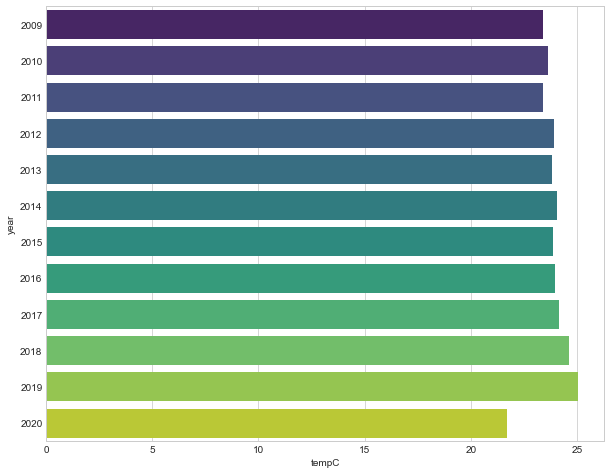

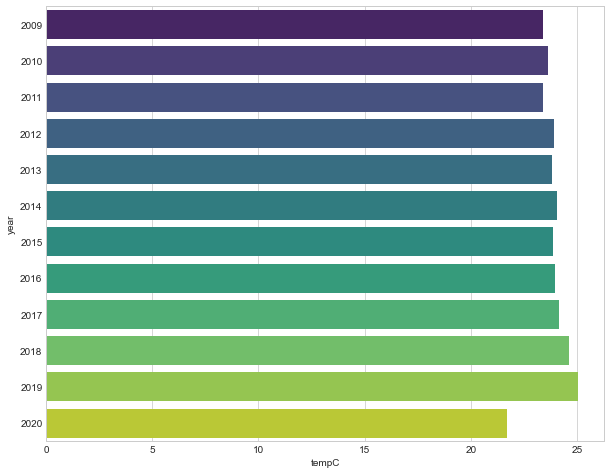

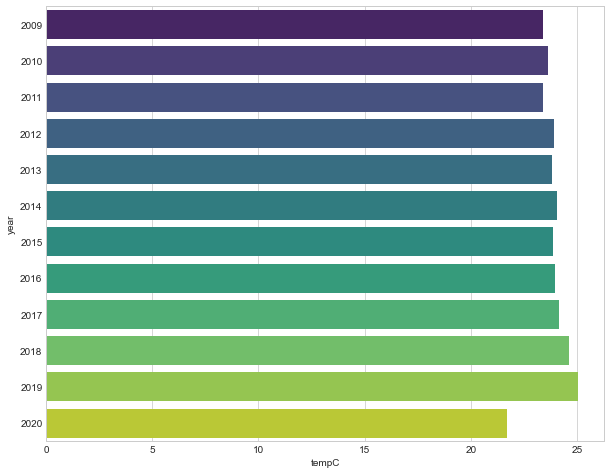

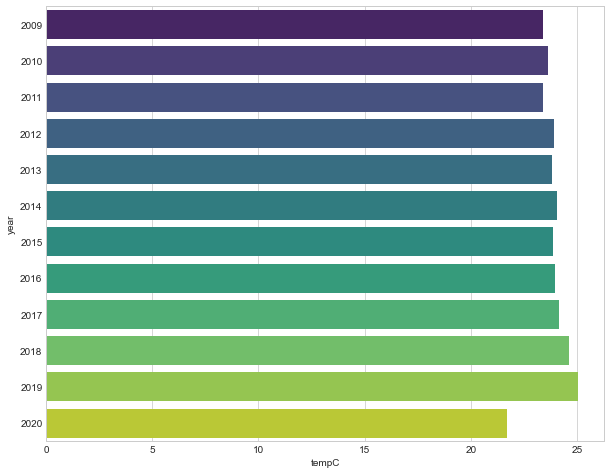

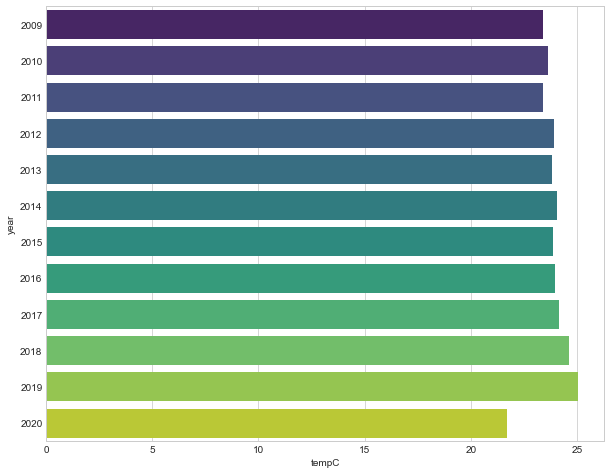

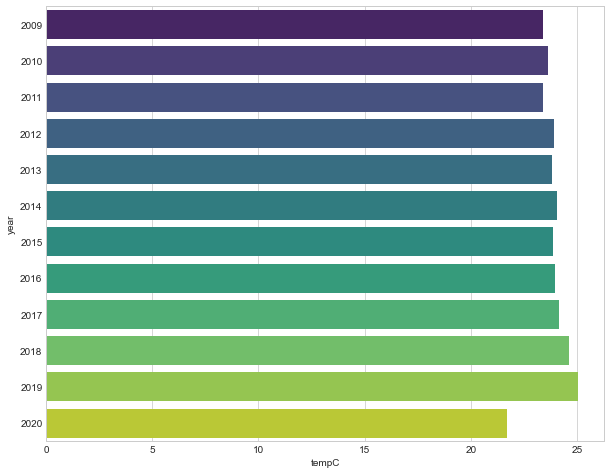

In [33]:
lis = ['bengaluru','bombay','delhi','hyderabad','jaipur','kanpur','nagpur','pune']
for i in lis:
    ClimatePred(i)


In [35]:
print(tempdf)


      bengaluru     bombay      delhi  hyderabad     jaipur     kanpur  \
year                                                                     
2020  21.708333  21.708333  21.708333  21.708333  21.708333  21.708333   
2019  25.017466  25.017466  25.017466  25.017466  25.017466  25.017466   
2018  24.631050  24.631050  24.631050  24.631050  24.631050  24.631050   
2017  24.145434  24.145434  24.145434  24.145434  24.145434  24.145434   
2016  23.949226  23.949226  23.949226  23.949226  23.949226  23.949226   
2015  23.849087  23.849087  23.849087  23.849087  23.849087  23.849087   
2014  24.060046  24.060046  24.060046  24.060046  24.060046  24.060046   
2013  23.810046  23.810046  23.810046  23.810046  23.810046  23.810046   
2012  23.898224  23.898224  23.898224  23.898224  23.898224  23.898224   
2011  23.389612  23.389612  23.389612  23.389612  23.389612  23.389612   
2010  23.627511  23.627511  23.627511  23.627511  23.627511  23.627511   
2009  23.406735  23.406735  23.406735 

In [36]:
print(humidf)


      bengaluru     bombay      delhi  hyderabad     jaipur     kanpur  \
year                                                                     
2020  78.125000  78.125000  78.125000  78.125000  78.125000  78.125000   
2019  62.811986  62.811986  62.811986  62.811986  62.811986  62.811986   
2018  60.087557  60.087557  60.087557  60.087557  60.087557  60.087557   
2017  63.423059  63.423059  63.423059  63.423059  63.423059  63.423059   
2016  63.342668  63.342668  63.342668  63.342668  63.342668  63.342668   
2015  65.878425  65.878425  65.878425  65.878425  65.878425  65.878425   
2014  63.027283  63.027283  63.027283  63.027283  63.027283  63.027283   
2013  64.752055  64.752055  64.752055  64.752055  64.752055  64.752055   
2012  62.953324  62.953324  62.953324  62.953324  62.953324  62.953324   
2011  66.415183  66.415183  66.415183  66.415183  66.415183  66.415183   
2010  71.526370  71.526370  71.526370  71.526370  71.526370  71.526370   
2009  69.605479  69.605479  69.605479 

In [37]:
print(percdf)

      bengaluru    bombay     delhi  hyderabad    jaipur    kanpur    nagpur  \
year                                                                           
2020   0.120833  0.120833  0.120833   0.120833  0.120833  0.120833  0.120833   
2019   0.226941  0.226941  0.226941   0.226941  0.226941  0.226941  0.226941   
2018   0.074178  0.074178  0.074178   0.074178  0.074178  0.074178  0.074178   
2017   0.081233  0.081233  0.081233   0.081233  0.081233  0.081233  0.081233   
2016   0.050979  0.050979  0.050979   0.050979  0.050979  0.050979  0.050979   
2015   0.061587  0.061587  0.061587   0.061587  0.061587  0.061587  0.061587   
2014   0.045103  0.045103  0.045103   0.045103  0.045103  0.045103  0.045103   
2013   0.044486  0.044486  0.044486   0.044486  0.044486  0.044486  0.044486   
2012   0.041746  0.041746  0.041746   0.041746  0.041746  0.041746  0.041746   
2011   0.056689  0.056689  0.056689   0.056689  0.056689  0.056689  0.056689   
2010   0.091313  0.091313  0.091313   0.